# Clustering 4 metode single avarage complete ward single

## Import Libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [316]:
import os

from google.colab import drive
drive.mount('/content/gdrive')
customer = pd.read_csv("/content/gdrive/MyDrive/Asuransi.csv")
customer.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1000 non-null   int64
 1   Annual_Premium        1000 non-null   int64
 2   Policy_Sales_Channel  1000 non-null   int64
 3   Vintage               1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [317]:
# cuplikan data customer
customer.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
0,22,36513,160,189
1,24,2630,160,268
2,22,35832,152,289
3,72,36685,26,113
4,66,2630,45,123


## Agglomerative Clustering

In [318]:
customer.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
0,22,36513,160,189
1,24,2630,160,268
2,22,35832,152,289
3,72,36685,26,113
4,66,2630,45,123


In [319]:
# checck missing value
customer.isna().sum()

,0
Age,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


Tidak ada missing value. Good

In [320]:
# check duplicated rows across all columns, as 'customer_id' column does not exist
customer.duplicated().sum()

np.int64(0)

Tidak ada duplicated ID. Good

In [321]:
# deskripsi statistik
customer.describe()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.653000,30364.102000,108.303000,154.565000
std,15.776929,16348.152121,55.577442,83.320815
min,20.000000,2630.000000,1.000000,10.000000
25%,25.000000,24415.250000,26.000000,88.000000
50%,38.000000,31511.500000,124.000000,154.000000
75%,50.250000,39555.750000,152.000000,227.000000
max,85.000000,100278.000000,163.000000,299.000000


Terdapat perbedaan skala: wajib feature scaling

In [322]:
# minmax scaler sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
customer_scaled = scaler.fit_transform(customer)

pd.DataFrame(customer_scaled).describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.302354,0.284021,0.662364,0.500225
std,0.242722,0.167419,0.343071,0.288307
min,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.223100,0.154321,0.269896
50%,0.276923,0.295772,0.759259,0.498270
75%,0.465385,0.378152,0.932099,0.750865
max,1.000000,1.000000,1.000000,1.000000


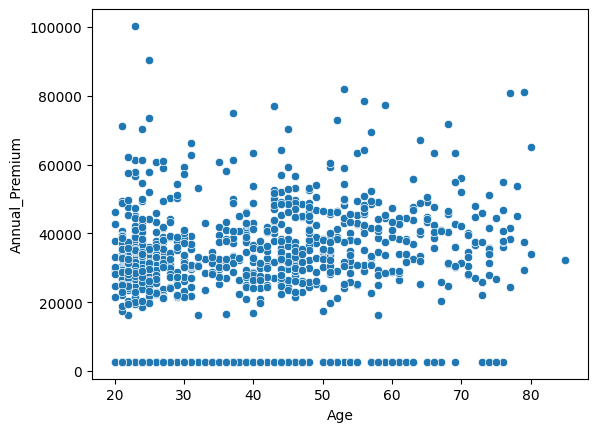

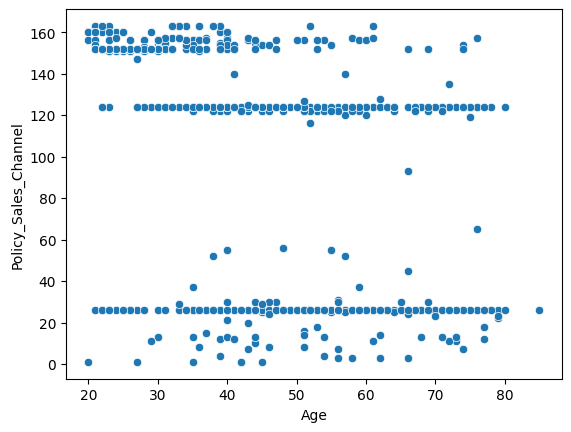

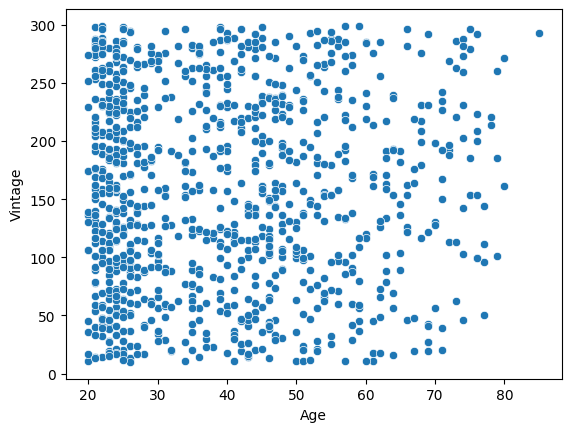

In [323]:
# draw age and spending columns as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium")
plt.show()
sns.scatterplot(data=customer, x="Age",y="Policy_Sales_Channel")
plt.show()
sns.scatterplot(data=customer, x="Age",y="Vintage")
plt.show()

In [324]:
# train agglomerative clustering with 5 clusters, linkage="ward"
from sklearn.cluster import AgglomerativeClustering
agg_clus_ward = AgglomerativeClustering(n_clusters=5,linkage="ward")
agg_clus_ward.fit(customer_scaled)

AgglomerativeClustering(n_clusters=5)

In [325]:
# assign clusters to customer dataframe
customer["label_ward"] = agg_clus_ward.labels_
customer.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,label_ward
0,22,36513,160,189,0
1,24,2630,160,268,0
2,22,35832,152,289,0
3,72,36685,26,113,4
4,66,2630,45,123,4


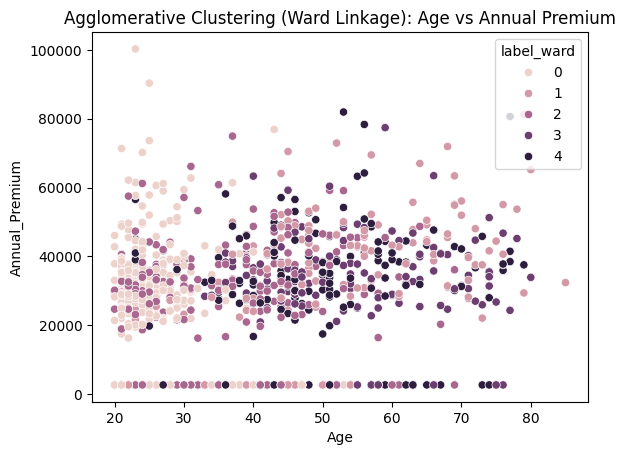

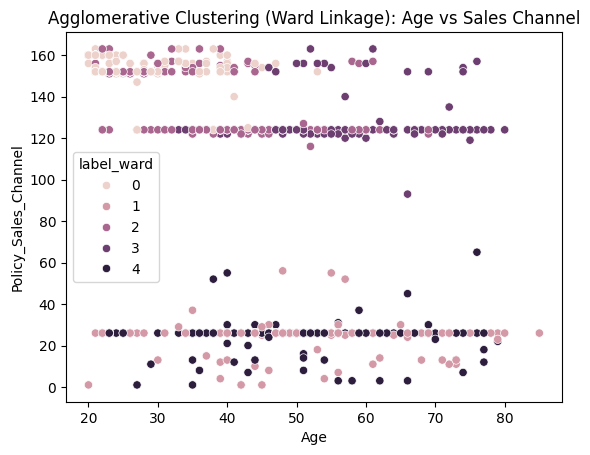

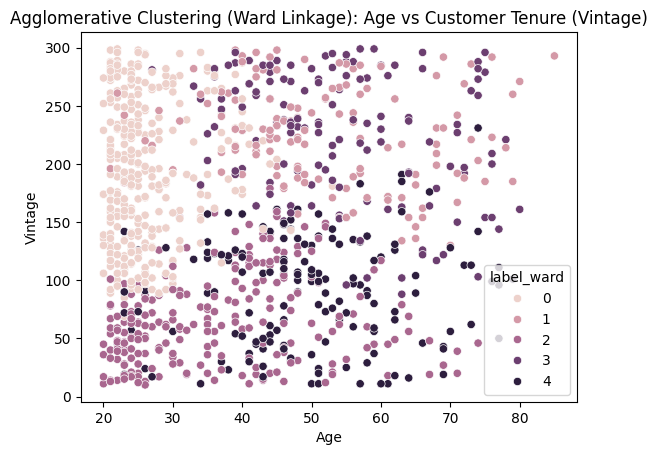

In [326]:
# draw as scatter plot
# Age vs Annual_Premium
sns.scatterplot(data=customer, x="Age", y="Annual_Premium", hue="label_ward")
plt.title("Agglomerative Clustering (Ward Linkage): Age vs Annual Premium")
plt.show()

# Age vs Policy_Sales_Channel
sns.scatterplot(data=customer, x="Age", y="Policy_Sales_Channel", hue="label_ward")
plt.title("Agglomerative Clustering (Ward Linkage): Age vs Sales Channel")
plt.show()

# Age vs Vintage
sns.scatterplot(data=customer, x="Age", y="Vintage", hue="label_ward")
plt.title("Agglomerative Clustering (Ward Linkage): Age vs Customer Tenure (Vintage)")
plt.show()

In [327]:
# train agglomerative clustering with 5 clusters, linkage="single"
from sklearn.cluster import AgglomerativeClustering
agg_clus_single = AgglomerativeClustering(n_clusters=5,linkage="single")
agg_clus_single.fit(customer_scaled)

AgglomerativeClustering(linkage='single', n_clusters=5)

In [328]:
# assign clusters to customer dataframe
customer["label_single"] = agg_clus_single.labels_
customer.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,label_ward,label_single
0,22,36513,160,189,0,0
1,24,2630,160,268,0,0
2,22,35832,152,289,0,0
3,72,36685,26,113,4,1
4,66,2630,45,123,4,1


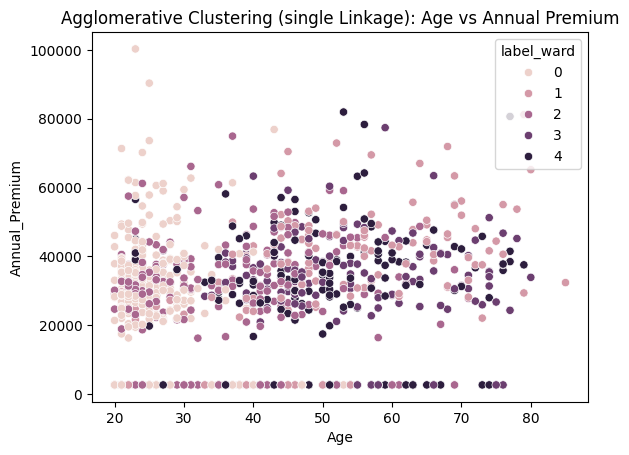

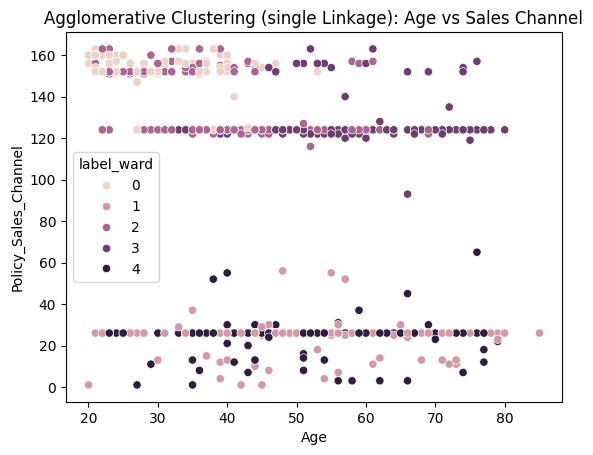

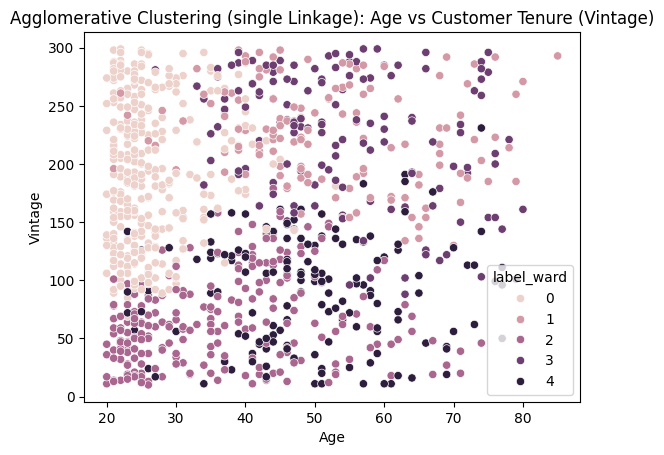

In [329]:
# draw as scatter plot
# Age vs Annual_Premium
sns.scatterplot(data=customer, x="Age", y="Annual_Premium", hue="label_ward")
plt.title("Agglomerative Clustering (single Linkage): Age vs Annual Premium")
plt.show()

# Age vs Policy_Sales_Channel
sns.scatterplot(data=customer, x="Age", y="Policy_Sales_Channel", hue="label_ward")
plt.title("Agglomerative Clustering (single Linkage): Age vs Sales Channel")
plt.show()

# Age vs Vintage
sns.scatterplot(data=customer, x="Age", y="Vintage", hue="label_ward")
plt.title("Agglomerative Clustering (single Linkage): Age vs Customer Tenure (Vintage)")
plt.show()

In [330]:
# train agglomerative clustering with 5 clusters, linkage="average"
from sklearn.cluster import AgglomerativeClustering
agg_clus_average = AgglomerativeClustering(n_clusters=5,linkage="average")
agg_clus_average.fit(customer_scaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [331]:
# assign clusters to customer dataframe
customer["label_average"] = agg_clus_average.labels_
customer.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,label_ward,label_single,label_average
0,22,36513,160,189,0,0,3
1,24,2630,160,268,0,0,3
2,22,35832,152,289,0,0,3
3,72,36685,26,113,4,1,1
4,66,2630,45,123,4,1,1


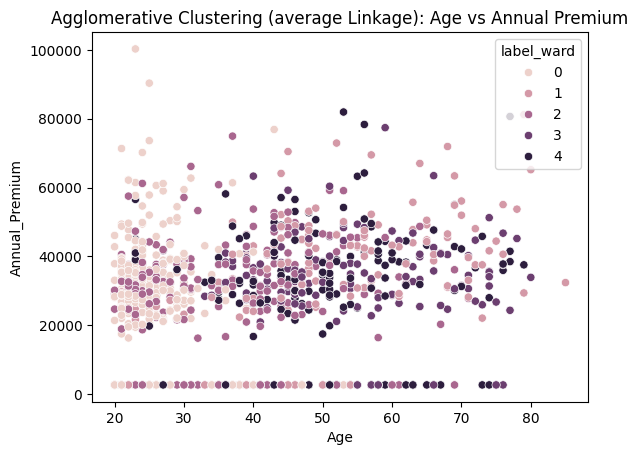

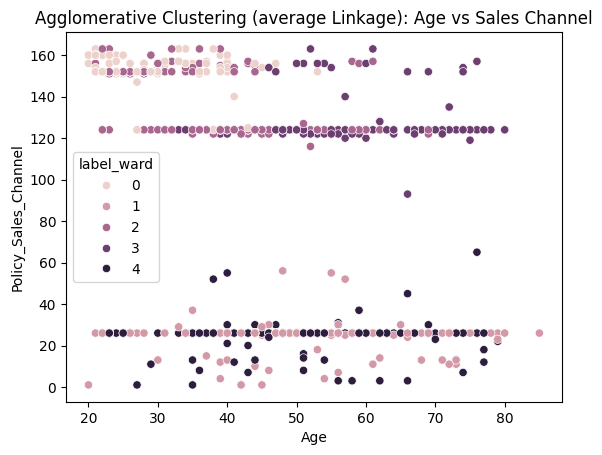

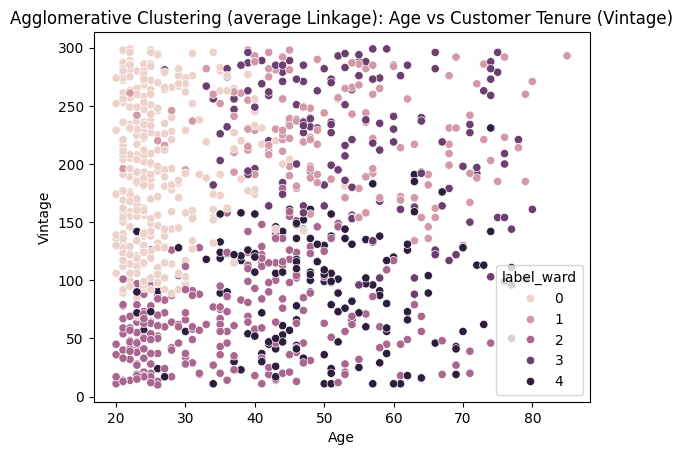

In [332]:
# draw as scatter plot
# Age vs Annual_Premium
sns.scatterplot(data=customer, x="Age", y="Annual_Premium", hue="label_ward")
plt.title("Agglomerative Clustering (average Linkage): Age vs Annual Premium")
plt.show()

# Age vs Policy_Sales_Channel
sns.scatterplot(data=customer, x="Age", y="Policy_Sales_Channel", hue="label_ward")
plt.title("Agglomerative Clustering (average Linkage): Age vs Sales Channel")
plt.show()

# Age vs Vintage
sns.scatterplot(data=customer, x="Age", y="Vintage", hue="label_ward")
plt.title("Agglomerative Clustering (average Linkage): Age vs Customer Tenure (Vintage)")
plt.show()

In [333]:
# train agglomerative clustering with 5 clusters, linkage="complete"
from sklearn.cluster import AgglomerativeClustering
agg_clus_complete = AgglomerativeClustering(n_clusters=5,linkage="complete")
agg_clus_complete.fit(customer_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [334]:
# assign clusters to customer dataframe
customer["label_complete"] = agg_clus_complete.labels_
customer.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,label_ward,label_single,label_average,label_complete
0,22,36513,160,189,0,0,3,3
1,24,2630,160,268,0,0,3,2
2,22,35832,152,289,0,0,3,2
3,72,36685,26,113,4,1,1,1
4,66,2630,45,123,4,1,1,1


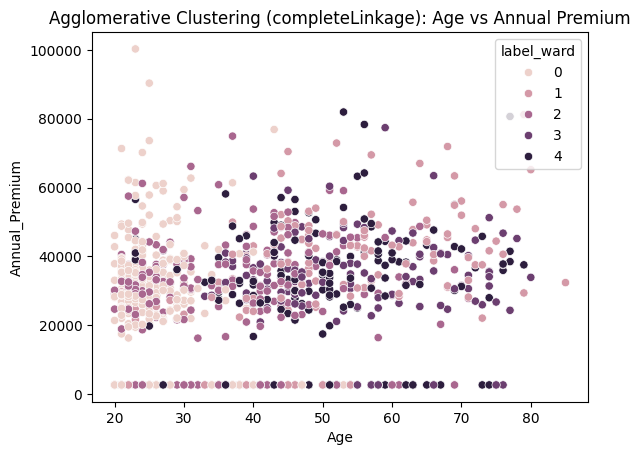

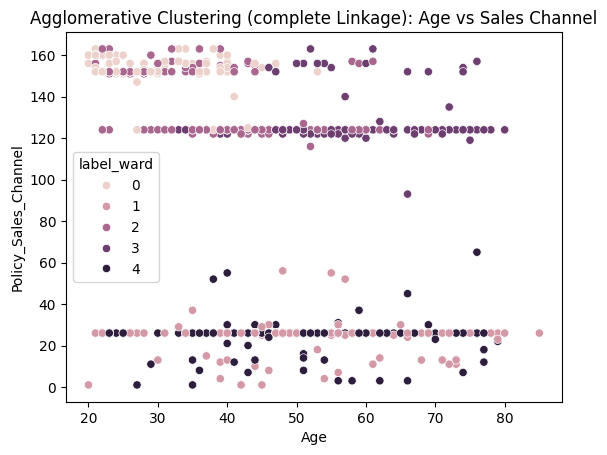

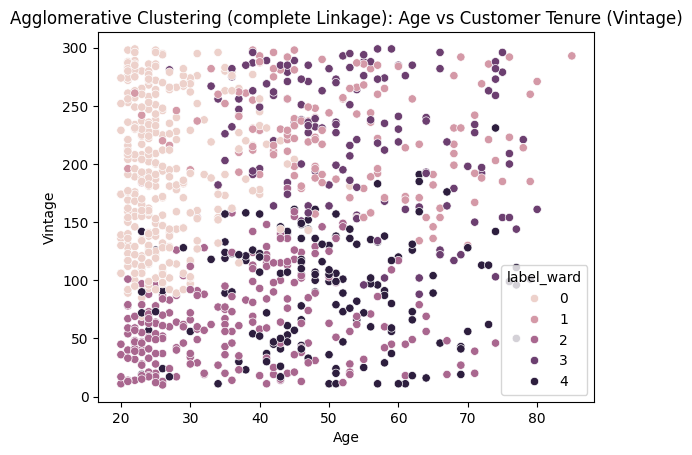

In [335]:
# draw as scatter plot
# Age vs Annual_Premium
sns.scatterplot(data=customer, x="Age", y="Annual_Premium", hue="label_ward")
plt.title("Agglomerative Clustering (completeLinkage): Age vs Annual Premium")
plt.show()

# Age vs Policy_Sales_Channel
sns.scatterplot(data=customer, x="Age", y="Policy_Sales_Channel", hue="label_ward")
plt.title("Agglomerative Clustering (complete Linkage): Age vs Sales Channel")
plt.show()

# Age vs Vintage
sns.scatterplot(data=customer, x="Age", y="Vintage", hue="label_ward")
plt.title("Agglomerative Clustering (complete Linkage): Age vs Customer Tenure (Vintage)")
plt.show()

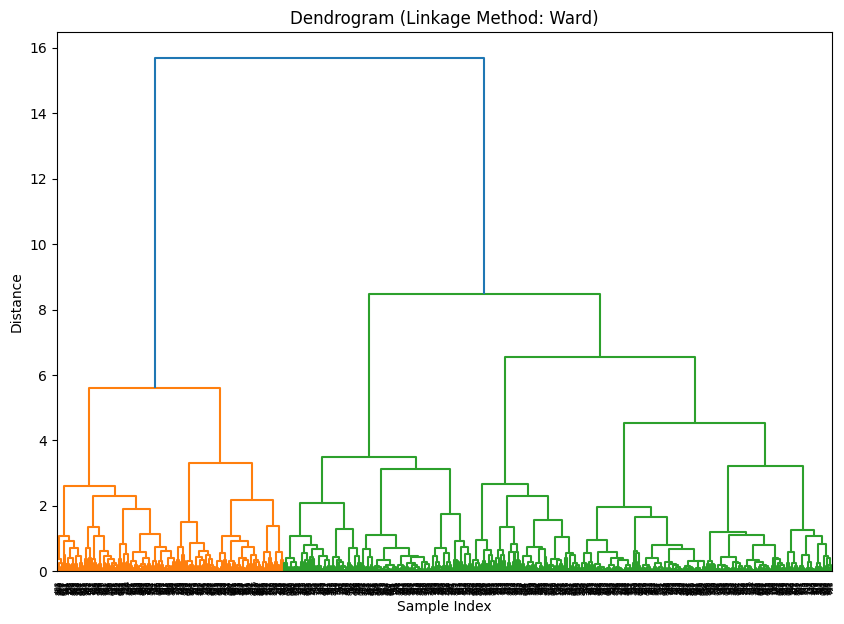

In [336]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

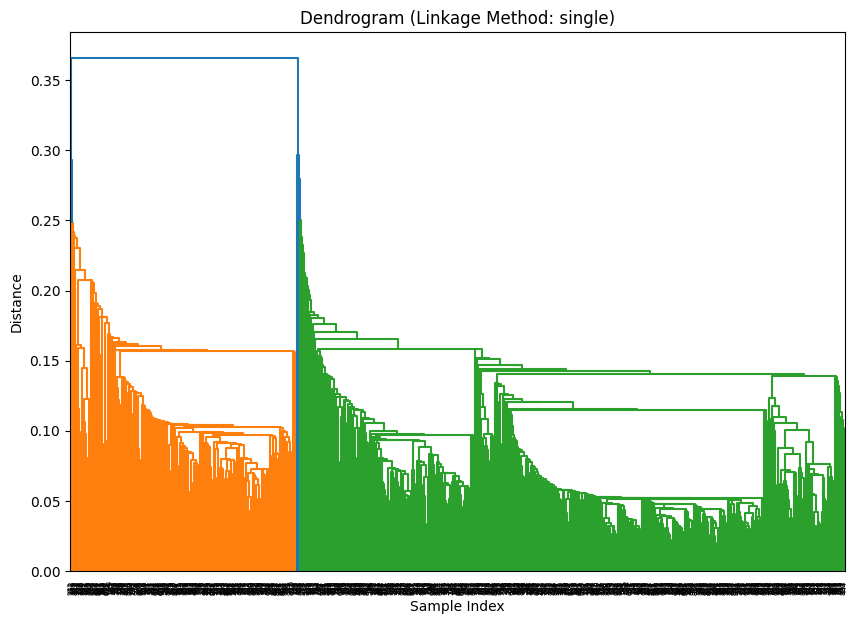

In [337]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="single")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: single)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

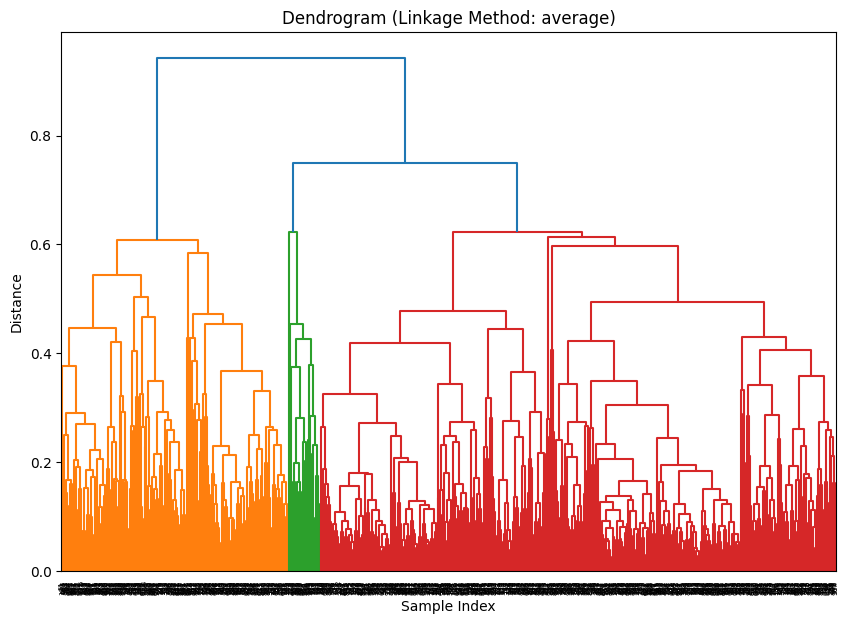

In [338]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="average")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: average)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

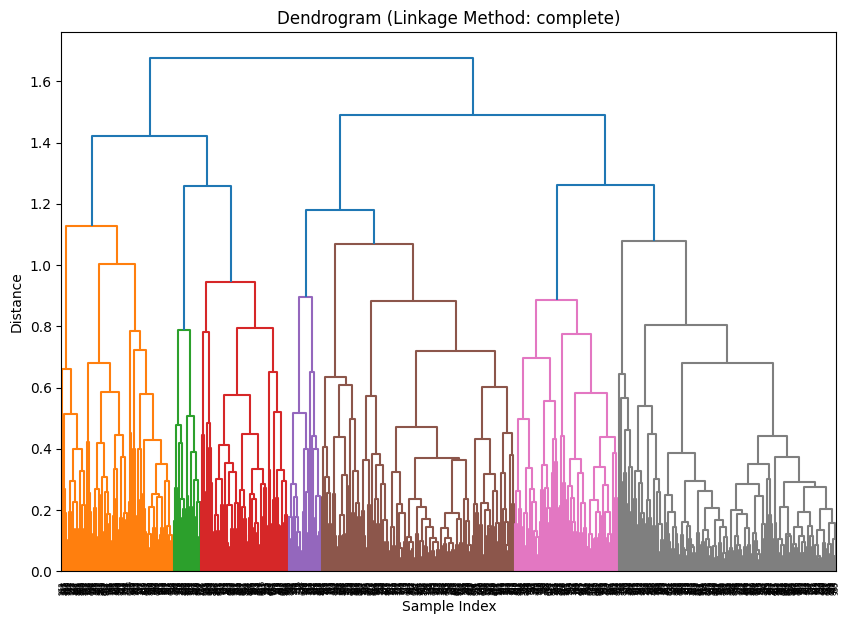

In [339]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="complete")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: complete)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [340]:
# --- Pastikan data sudah di-scale ---
X = customer_scaled

# --- Daftar metode linkage dan jarak yang diuji ---
linkage_methods = ["single", "complete", "average", "ward"]
distance_metrics = ["euclidean", "cityblock", "canberra"]

# --- Hasil disimpan di DataFrame ---
results = []

for linkage in linkage_methods:
    row = {"Metode": linkage.title() + " Linkage"}
    for metric in distance_metrics:
        # Ward hanya bisa pakai Euclidean
        if linkage == "ward" and metric != "euclidean":
            row[f"Jarak {metric.title()}"] = "-"
            continue
        model = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric=metric)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels, metric=metric)
        row[f"Jarak {metric.title()}"] = round(score, 2)
    results.append(row)

# --- Buat tabel hasil ---
tabel_validasi = pd.DataFrame(results)
tabel_validasi.rename(columns={
    "Jarak Euclidean": "Jarak Euclidean",
    "Jarak Cityblock": "Jarak Manhattan",
    "Jarak Canberra": "Jarak Canberra"
}, inplace=True)

print("=== TABEL VALIDASI CLUSTER (Silhouette Coefficient) ===")
display(tabel_validasi)

=== TABEL VALIDASI CLUSTER (Silhouette Coefficient) ===


,Metode,Jarak Euclidean,Jarak Manhattan,Jarak Canberra
0,Single Linkage,0.26,0.24,0.12
1,Complete Linkage,0.28,0.26,0.34
2,Average Linkage,0.31,0.29,0.37
3,Ward Linkage,0.29,-,-


Less useful, to be honest~

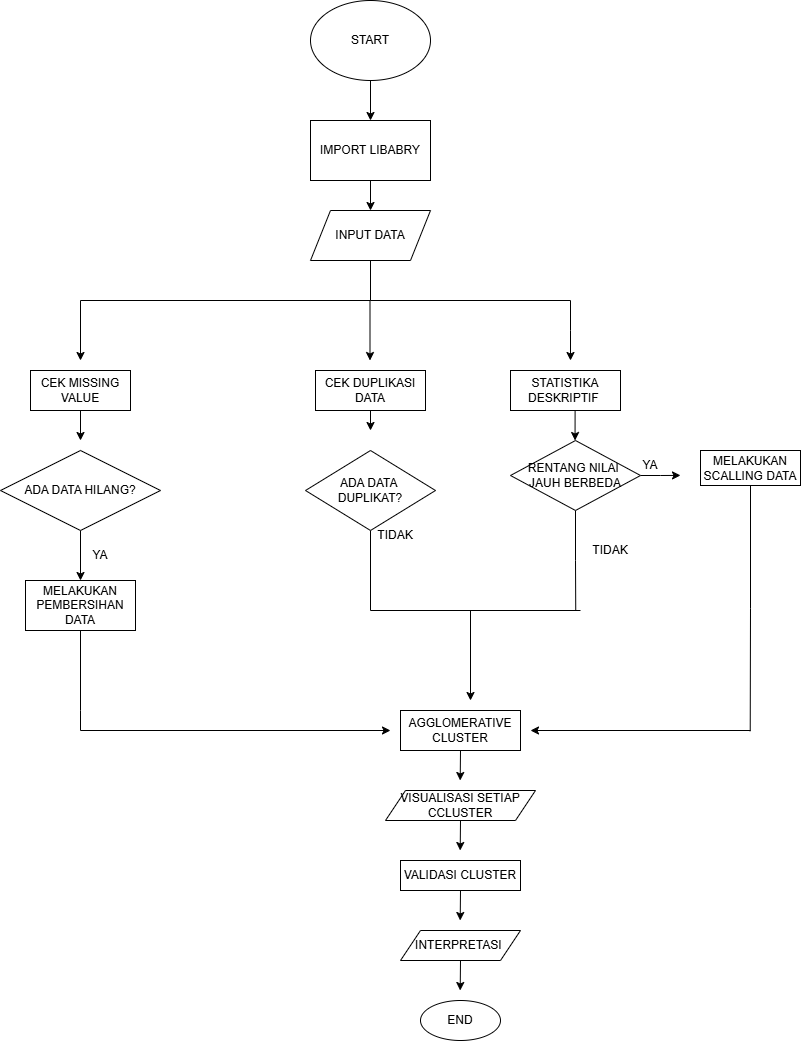

# Selesai